In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,NaN,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,NaN,NaN,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,NaN,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,NaN,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,NaN,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,NaN,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,NaN,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	36
float64		column 3	36
float64		column 4	37
float64		column 5	55
float64		column 6	42
float64		column 7	24
float64		column 8	24
float64		column 9	37
float64		column 10	25
float64		column 11	37
float64		column 12	55


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,370.000000,364.000000,364.000000,363.000000,345.000000,358.000000,376.000000,376.000000,363.000000,375.000000,363.000000,345.000000
mean,-0.161050,0.059166,2.011108,1.922581,1.912722,2.014837,2.016540,1.985231,1.990265,2.046009,1.968942,1.979732
std,2.434031,2.734573,1.113569,1.095121,1.098297,1.136054,1.141968,1.131305,1.136640,1.135126,1.137523,1.153376
min,-7.771000,-6.828400,0.005583,0.005376,0.036095,0.018503,0.003618,0.007321,0.007019,0.067105,0.030430,0.001972
25%,-0.688645,-0.781105,1.128525,1.012765,0.939270,1.121875,1.030075,1.042125,1.084900,1.063850,0.977100,1.023100
50%,-0.083913,0.015595,2.062800,1.819600,1.884600,2.053100,2.087750,1.939100,2.106800,2.103500,1.902000,1.939900
75%,0.709052,0.879252,2.938525,2.776450,2.853400,2.975175,2.928500,2.972650,2.945800,3.037950,2.940850,2.946100
max,8.409300,6.777100,3.976400,3.993400,3.971200,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.981000


<AxesSubplot:>

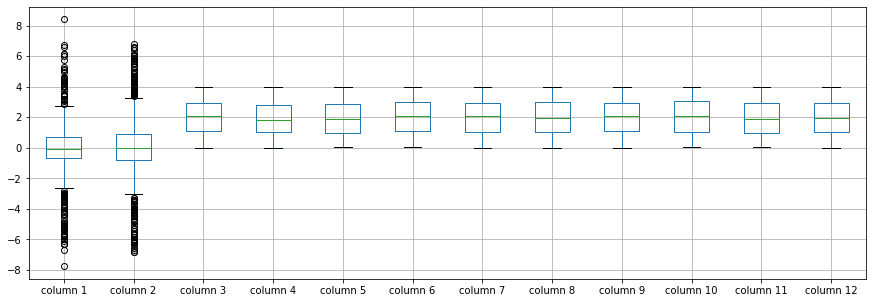

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.161050
column 2     0.059166
column 3     2.011108
column 4     1.922581
column 5     1.912722
column 6     2.014837
column 7     2.016540
column 8     1.985231
column 9     1.990265
column 10    2.046009
column 11    1.968942
column 12    1.979732
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.014871,-0.031134,-0.023143,0.038439,-0.059770,0.008502,0.054862,-0.036653,0.045623,0.119065,-0.025178
column 2,0.014871,1.000000,-0.006872,0.045965,-0.071790,-0.106830,0.016329,-0.023041,0.043235,0.045827,-0.037523,0.075191
column 3,-0.031134,-0.006872,1.000000,0.051271,-0.020988,-0.038236,-0.103779,0.074356,0.116368,0.020204,-0.080553,-0.011318
column 4,-0.023143,0.045965,0.051271,1.000000,-0.030540,0.128802,-0.018250,0.110384,-0.040453,0.083586,-0.021364,0.017467
column 5,0.038439,-0.071790,-0.020988,-0.030540,1.000000,0.053359,-0.045755,0.008757,0.068686,-0.010161,0.028012,-0.066106
column 6,-0.059770,-0.106830,-0.038236,0.128802,0.053359,1.000000,0.011725,0.047808,-0.023981,-0.035420,0.019220,-0.059344
column 7,0.008502,0.016329,-0.103779,-0.018250,-0.045755,0.011725,1.000000,-0.018593,0.057306,0.046776,0.010716,-0.059952
column 8,0.054862,-0.023041,0.074356,0.110384,0.008757,0.047808,-0.018593,1.000000,0.039698,-0.137589,-0.085922,-0.022117
column 9,-0.036653,0.043235,0.116368,-0.040453,0.068686,-0.023981,0.057306,0.039698,1.000000,0.006541,-0.002077,0.050629
column 10,0.045623,0.045827,0.020204,0.083586,-0.010161,-0.035420,0.046776,-0.137589,0.006541,1.000000,0.022047,0.000300


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+30,12+30+30,12+30+30+30,12+30+30+30+30,12+30+30+30+30+30,12+30+30+30+30+30+30,12+30+30+30+30+30+30+30,12+30+30+30+30+30+30,12+30+30+30+30+30,12+30+30+30+30,12+30+30+30,12+30+30,12+30,12], vae_layer = False, seed = 30)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.181571350097656
Epoch: 1 , loss: 25.10317741394043
Epoch: 2 , loss: 25.050534133911132
Epoch: 3 , loss: 24.98698631286621
Epoch: 4 , loss: 24.85926445007324
Epoch: 5 , loss: 24.442565383911134
Epoch: 6 , loss: 21.717096786499024
Epoch: 7 , loss: 20.439875030517577
Epoch: 8 , loss: 20.100981521606446
Epoch: 9 , loss: 19.734356002807615
Epoch: 10 , loss: 19.50426513671875
Epoch: 11 , loss: 19.291128692626952
Epoch: 12 , loss: 19.046044692993163
Epoch: 13 , loss: 19.05275047302246
Epoch: 14 , loss: 18.53621627807617
Epoch: 15 , loss: 18.56671485900879
Epoch: 16 , loss: 18.574013442993163
Epoch: 17 , loss: 18.21876174926758
Epoch: 18 , loss: 18.23468936920166
Epoch: 19 , loss: 17.915672187805175
Epoch: 20 , loss: 17.934758338928223
Epoch: 21 , loss: 17.75989055633545
Epoch: 22 , loss: 17.725149002075195
Epoch: 23 , loss: 17.641216049194338
Epoch: 24 , loss: 18.027801094055175
Epoch: 25 , loss: 17.676076

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     0.638933
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.153310,0.0,0.0,0.0
1,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.00000,0.000000,0.0,0.224907,0.369215,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-1.400758,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.00000,4.794142,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
396,0.00000,0.000000,0.0,-0.820914,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
397,0.00000,2.008887,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
398,-7.35179,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.293589,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(41.658395293873006, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.25514334728891974

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    0.939671
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.836300,2.886600,2.46960,0.21541,3.09000,1.936740,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.434300,3.129900,1.27780,1.42850,0.14333,1.194800,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.337100,3.768200,1.21000,3.99630,2.21730,3.902900,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.557687,0.559485,0.56716,1.66010,2.35270,0.661260,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.561600,3.201400,3.37740,1.52260,0.98475,1.708642,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,0.064942,3.72580,3.704800,0.882690,0.35406,1.62780,3.29400,1.085000,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,0.516786,1.418700,1.68610,1.09510,3.79360,0.127900,0.54249,3.36580,3.755600
397,-3.479100,0.015587,1.32480,1.772100,2.550900,1.47010,0.92540,1.84110,3.477300,0.95496,1.52630,2.123800
398,-0.058790,-0.411470,2.49480,0.396550,2.999000,3.41010,2.95160,0.27800,0.697001,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NL_10(imp).xlsx", index=False, header=False)